# OASIS 3 
$Ajinkya, Navya, Shibani, Chaitanya$

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Data processing

In [ ]:
def main(list1, list2, output_name, lower_bound, upper_bound):
    # Create dataframes with provided CSV files
    list1 = pd.read_csv(list1)
    list2 = pd.read_csv(list2)
    
    # print(f"shape list1: {list1.shape}")
    # print(f"shape list2: {list2.shape}")

    # Create a Day column from ID
    list1['Day'] = list1.iloc[:, 0].apply(lambda x: int(x.split('_')[2][1:]))
    list2['Day'] = list2.iloc[:,0].apply(lambda x: int(x.split('_')[2][1:]))
    
    # Update list1 to only consider subjects that are in both lists
    list1 =list1.loc[list1['Subject'].isin(list2['Subject'])]
    
    # Create and populate the dataframe
    out_df = pd.DataFrame()
    for index, row in list2.iterrows():
        mask = (list1['Subject'] == row['Subject']) & ((list1['Day'] > row['Day'] - upper_bound) & (list1['Day'] < row['Day'] + lower_bound))
        # print(mask.shape)
        for name in row.index:
            list1.loc[mask, name +'_X'] = row[name]
    
    # Drop rows of which a match was not found
    list1.dropna(how = 'all' ,inplace=True)

    list1.to_csv(output_name, index=False)

In [ ]:
dir_path = '/content/drive/MyDrive/DS2- Project/oasis3/'

### adrc

In [ ]:
adrc = pd.read_csv(dir_path + 'adrc_clinical.csv')
adrc.head()

,ADRC_ADRCCLINICALDATA ID,Subject,Date,Age,mmse,ageAtEntry,cdr,commun,dx1,dx2,...,apoe,sumbox,acsparnt,height,weight,primStudy,acsStudy,Race,Ethnicity,Education
0,OAS30001_ClinicalData_d0000,OAS30001,NaN,NaN,28.0,65.149895,0.0,0.0,Cognitively normal,.,...,23.0,0.0,NaN,NaN,NaN,NaN,NaN,Caucasian,Non-Hispanic,12.0
1,OAS30001_ClinicalData_d0339,OAS30001,NaN,NaN,28.0,65.149895,0.0,0.0,Cognitively normal,.,...,23.0,0.0,NaN,64.0,155.0,NaN,NaN,Caucasian,Non-Hispanic,12.0
2,OAS30001_ClinicalData_d0722,OAS30001,NaN,NaN,30.0,65.149895,0.0,0.0,Cognitively normal,.,...,23.0,0.0,NaN,64.0,162.0,NaN,NaN,Caucasian,Non-Hispanic,12.0
3,OAS30001_ClinicalData_d1106,OAS30001,NaN,NaN,30.0,65.149895,0.0,0.0,Cognitively normal,.,...,23.0,0.0,NaN,64.0,167.0,NaN,NaN,Caucasian,Non-Hispanic,12.0
4,OAS30001_ClinicalData_d1456,OAS30001,NaN,NaN,30.0,65.149895,0.0,0.0,Cognitively normal,.,...,23.0,0.0,NaN,63.0,173.0,NaN,NaN,Caucasian,Non-Hispanic,12.0


In [ ]:
adrc.isna().sum() / adrc.shape[0]  *100

ADRC_ADRCCLINICALDATA ID      0.000000
Subject                       0.000000
Date                        100.000000
Age                         100.000000
mmse                          2.763496
ageAtEntry                    0.000000
cdr                           0.000000
commun                        0.128535
dx1                           0.032134
dx2                           0.208869
dx3                           0.208869
dx4                           0.208869
dx5                           0.208869
homehobb                      0.128535
judgment                      0.128535
memory                        0.128535
orient                        0.144602
perscare                      0.128535
apoe                          0.899743
sumbox                        0.128535
acsparnt                    100.000000
height                       20.228149
weight                        7.696015
primStudy                   100.000000
acsStudy                    100.000000
Race                     

In [ ]:
adrc.shape

(6224, 28)

In [ ]:
adrc['sumbox'].unique()

array([ 0. ,  0.5,  2.5,  1.5,  1. ,  3. ,  2. ,  7. ,  8. ,  5. , 10. ,
        4.5, 16. ,  6. , 12. ,  5.5,  3.5,  4. ,  9. , 13. , 14. ,  8.5,
       11. ,  6.5, 15. ,  7.5, 17. , 18. ,  nan])

In [ ]:
(adrc['sumbox'] == adrc['cdr']).sum()

4562

In [ ]:
columns_to_drop = ['Date', 'Age', 'acsparnt', 'primStudy', 'acsStudy', 'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'commun', 'homehobb', 'judgment', 'memory', 'orient', 'perscare']

adrc.drop(columns = columns_to_drop, inplace = True)

adrc

,ADRC_ADRCCLINICALDATA ID,Subject,mmse,ageAtEntry,cdr,apoe,sumbox,height,weight,Race,Ethnicity,Education
0,OAS30001_ClinicalData_d0000,OAS30001,28.0,65.149895,0.0,23.0,0.0,NaN,NaN,Caucasian,Non-Hispanic,12.0
1,OAS30001_ClinicalData_d0339,OAS30001,28.0,65.149895,0.0,23.0,0.0,64.0,155.0,Caucasian,Non-Hispanic,12.0
2,OAS30001_ClinicalData_d0722,OAS30001,30.0,65.149895,0.0,23.0,0.0,64.0,162.0,Caucasian,Non-Hispanic,12.0
3,OAS30001_ClinicalData_d1106,OAS30001,30.0,65.149895,0.0,23.0,0.0,64.0,167.0,Caucasian,Non-Hispanic,12.0
4,OAS30001_ClinicalData_d1456,OAS30001,30.0,65.149895,0.0,23.0,0.0,63.0,173.0,Caucasian,Non-Hispanic,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6219,OAS31172_ClinicalData_d1215,OAS31172,30.0,70.902120,0.0,23.0,0.0,61.0,137.0,Caucasian,Non-Hispanic,16.0
6220,OAS31172_ClinicalData_d1565,OAS31172,30.0,70.902120,0.0,23.0,0.0,61.0,133.0,Caucasian,Non-Hispanic,16.0
6221,OAS31172_ClinicalData_d1908,OAS31172,29.0,70.902120,0.0,23.0,0.0,61.0,131.0,Caucasian,Non-Hispanic,16.0
6222,OAS31172_ClinicalData_d2816,OAS31172,29.0,70.902120,0.0,23.0,0.0,61.0,134.0,Caucasian,Non-Hispanic,16.0


In [ ]:
adrc.groupby('Subject').apply(lambda x: x.ffill().bfill()).to_csv(dir_path + 'cleaned/' + 'adrc_clinical.csv', index = False)

### Psych

In [ ]:
psych = pd.read_csv(dir_path + 'Psych.csv')
psych.head()

,CNDA_PSYCHOMETRICSDATA ID,Subject,LOGIMEM,DIGIF,DIGIFLEN,DIGIB,DIGIBLEN,ANIMALS,VEG,TRAILA,TRAILARR,TRAILALI,TRAILB,TRAILBRR,TRAILBLI,WAIS,MEMUNITS,MEMTIME,BOSTON
0,OAS30001_UDSc1_d0014,OAS30001,15.0,8.0,6.0,6.0,5.0,20.0,16.0,27.0,NaN,NaN,64.0,NaN,NaN,59.0,14.0,14.0,28.0
1,OAS30001_UDSc1_d0360,OAS30001,17.0,9.0,7.0,4.0,3.0,20.0,15.0,31.0,NaN,NaN,64.0,NaN,NaN,63.0,17.0,15.0,29.0
2,OAS30001_UDSc1_d0731,OAS30001,12.0,7.0,6.0,4.0,4.0,22.0,15.0,24.0,0.0,24.0,73.0,0.0,24.0,75.0,12.0,19.0,30.0
3,OAS30001_UDSc1_d1116,OAS30001,13.0,9.0,7.0,6.0,4.0,23.0,14.0,42.0,0.0,24.0,74.0,0.0,24.0,62.0,13.0,16.0,29.0
4,OAS30001_UDSc1_d1472,OAS30001,14.0,8.0,7.0,5.0,4.0,18.0,18.0,28.0,0.0,24.0,82.0,2.0,24.0,66.0,16.0,18.0,29.0


In [ ]:
psych.groupby('Subject').apply(lambda x: x.ffill().bfill()).to_csv(dir_path + 'cleaned/' + 'Psych.csv', index = False)

In [ ]:
psych.isna().sum() / psych.shape[0] * 100

CNDA_PSYCHOMETRICSDATA ID     0.000000
Subject                       0.000000
LOGIMEM                       0.269300
DIGIF                         0.059844
DIGIFLEN                      0.059844
DIGIB                         0.239378
DIGIBLEN                      0.239378
ANIMALS                       0.209455
VEG                           0.269300
TRAILA                        0.508677
TRAILARR                     15.050868
TRAILALI                     15.050868
TRAILB                        5.116697
TRAILBRR                     18.880910
TRAILBLI                     18.880910
WAIS                          2.304010
MEMUNITS                      0.359066
MEMTIME                       0.508677
BOSTON                        0.299222
dtype: float64

### uds a1

In [ ]:
a1 = pd.read_csv(dir_path + 'uds_A1.csv')
a1.head()

,UDS_A1SUBDEMODATA ID,Subject,RACE,PRIMLANG,LIVSIT,INDEPEND,RESIDENC,MARISTAT,HANDED
0,OAS30001_USDa1_d0000,OAS30001,1.0,1.0,2.0,1.0,1.0,1.0,2.0
1,OAS30001_USDa1_d0339,OAS30001,NaN,NaN,2.0,1.0,1.0,1.0,NaN
2,OAS30001_USDa1_d0722,OAS30001,NaN,NaN,2.0,1.0,1.0,1.0,NaN
3,OAS30001_USDa1_d1106,OAS30001,NaN,NaN,2.0,1.0,1.0,1.0,NaN
4,OAS30001_USDa1_d1456,OAS30001,NaN,NaN,2.0,1.0,1.0,1.0,NaN


In [ ]:
a1.groupby('Subject').apply(lambda x: x.ffill().bfill()).to_csv(dir_path + 'cleaned/' + 'uds_A1.csv', index = False)

### fam hist a3

In [ ]:
a3 = pd.read_csv(dir_path + 'fam_hist_a3.csv')
a3.head()

,UDS_A3SBFMHSTDATA ID,Subject,MOMLIV,MOMDEM,MOMONSET,DADLIV,DADDEM,DADONSET,TWIN,TWINTYPE,SIBS,KIDS,RELSDEM
0,OAS30001_USDa3_d0000,OAS30001,NaN,1.0,77.0,NaN,0.0,NaN,0.0,NaN,2.0,3.0,1.0
1,OAS30001_USDa3_d0339,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OAS30001_USDa3_d0722,OAS30001,0.0,1.0,77.0,0.0,0.0,NaN,NaN,NaN,4.0,3.0,1.0
3,OAS30001_USDa3_d1106,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OAS30001_USDa3_d1456,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
a3.loc[:, ['Subject', 'MOMLIV', 'MOMDEM', 'DADLIV', 'DADDEM', 'TWIN', 'SIBS', 'KIDS', 'RELSDEM']] = a3[['Subject', 'MOMLIV', 'MOMDEM', 'DADLIV', 'DADDEM', 'TWIN', 'SIBS','KIDS', 'RELSDEM']].groupby('Subject').apply(lambda x: x.ffill().bfill())
a3

,UDS_A3SBFMHSTDATA ID,Subject,MOMLIV,MOMDEM,MOMONSET,DADLIV,DADDEM,DADONSET,TWIN,TWINTYPE,SIBS,KIDS,RELSDEM
0,OAS30001_USDa3_d0000,OAS30001,0.0,1.0,77.0,0.0,0.0,NaN,0.0,NaN,2.0,3.0,1.0
1,OAS30001_USDa3_d0339,OAS30001,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,2.0,3.0,1.0
2,OAS30001_USDa3_d0722,OAS30001,0.0,1.0,77.0,0.0,0.0,NaN,0.0,NaN,4.0,3.0,1.0
3,OAS30001_USDa3_d1106,OAS30001,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,4.0,3.0,1.0
4,OAS30001_USDa3_d1456,OAS30001,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,OAS31172_USDa3_d0406,OAS31172,1.0,1.0,81.0,0.0,1.0,79.0,0.0,NaN,3.0,2.0,4.0
4085,OAS31172_USDa3_d0823,OAS31172,1.0,1.0,NaN,0.0,1.0,NaN,0.0,NaN,3.0,2.0,4.0
4086,OAS31172_USDa3_d1215,OAS31172,1.0,1.0,NaN,0.0,1.0,NaN,0.0,NaN,3.0,2.0,4.0
4087,OAS31172_USDa3_d1565,OAS31172,1.0,1.0,NaN,0.0,1.0,NaN,0.0,NaN,3.0,2.0,4.0


In [ ]:
a3.TWINTYPE.value_counts()

8.0    19
2.0    12
0.0     4
1.0     1
Name: TWINTYPE, dtype: int64

In [ ]:
a3.loc[a3['MOMDEM']!=1, 'MOMONSET'] = -1

In [ ]:
a3.loc[a3['DADDEM']!=1, 'DADONSET'] = -1

In [ ]:
a3.drop(columns = ['TWIN', 'TWINTYPE'], inplace = True)

In [ ]:
a3.loc[:, ['Subject', 'MOMONSET', 'DADONSET']] = a3[['Subject', 'MOMONSET', 'DADONSET']].groupby('Subject').apply(lambda x : x.ffill().bfill())
a3.to_csv(dir_path + 'cleaned/' + 'fam_hist_a3.csv', index = False)

### b9 clin judge

In [ ]:
b9 = pd.read_csv(dir_path + 'b9_clin_judge.csv')
b9.head()

,UDS_B9CLINJDGDATA ID,Subject,DECSUB,DECIN,DECCLIN
0,OAS30001_USDb9_d0000,OAS30001,0.0,0.0,0.0
1,OAS30001_USDb9_d0339,OAS30001,NaN,NaN,NaN
2,OAS30001_USDb9_d0722,OAS30001,0.0,0.0,0.0
3,OAS30001_USDb9_d1106,OAS30001,0.0,0.0,0.0
4,OAS30001_USDb9_d1456,OAS30001,0.0,0.0,0.0


In [ ]:
b9.groupby('Subject').apply(lambda x: x.ffill().bfill()).to_csv(dir_path + 'cleaned/' + 'b9_clin_judge.csv', index = False)

### b8 neuro findings

In [ ]:
b8 = pd.read_csv(dir_path + 'b8_neuro_findings.csv')
b8

,UDS_B8EVALDATA ID,Subject,NORMAL,FOCLDEF,GAITDIS,EYEMOVE
0,OAS30001_USDb8_d0000,OAS30001,1.0,0.0,0.0,0.0
1,OAS30001_USDb8_d0339,OAS30001,1.0,0.0,0.0,0.0
2,OAS30001_USDb8_d0722,OAS30001,1.0,0.0,0.0,0.0
3,OAS30001_USDb8_d1106,OAS30001,1.0,0.0,0.0,0.0
4,OAS30001_USDb8_d1456,OAS30001,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
4084,OAS31172_USDb8_d0406,OAS31172,1.0,0.0,0.0,0.0
4085,OAS31172_USDb8_d0823,OAS31172,0.0,0.0,0.0,0.0
4086,OAS31172_USDb8_d1215,OAS31172,1.0,0.0,0.0,0.0
4087,OAS31172_USDb8_d1565,OAS31172,1.0,0.0,0.0,0.0


In [ ]:
b8.groupby('Subject').apply(lambda x: x.ffill().bfill()).to_csv(dir_path + 'cleaned/' + 'b8_neuro_findings.csv', index = False)

### b7 

In [ ]:
b7 = pd.read_csv(dir_path + 'b7_faq.csv')
b7.isna().sum()

UDS_B7FAQDATA ID     0
Subject              0
BILLS               23
TAXES               21
SHOPPING            21
GAMES               24
STOVE               23
MEALPREP            27
EVENTS              27
PAYATTN             26
REMDATES            21
TRAVEL              22
dtype: int64

In [ ]:
b7.groupby('Subject').apply(lambda x: x.ffill().bfill()).to_csv(dir_path + 'cleaned/' + 'b7_faq.csv', index = False)

### b6 gds

In [ ]:
b6 = pd.read_csv(dir_path + 'b6_gds.csv')
b6.head()

,UDS_B6BEVGDSDATA ID,Subject,GDS
0,OAS30001_USDb6_d0000,OAS30001,1.0
1,OAS30001_USDb6_d0339,OAS30001,0.0
2,OAS30001_USDb6_d0722,OAS30001,2.0
3,OAS30001_USDb6_d1106,OAS30001,0.0
4,OAS30001_USDb6_d1456,OAS30001,0.0


In [ ]:
b6.groupby('Subject').apply(lambda x: x.ffill().bfill()).to_csv(dir_path + 'cleaned/' + 'b6_gds.csv', index = False)

### b5

In [ ]:
b5 = pd.read_csv(dir_path + 'b5_npi.csv')
b5.head()

,UDS_B5BEHAVASDATA ID,Subject,NPIQINF,NPIQINFX,DEL,DELSEV,HALL,HALLSEV,AGIT,AGITSEV,...,DISN,DISNSEV,IRR,IRRSEV,MOT,MOTSEV,NITE,NITESEV,APP,APPSEV
0,OAS30001_USDb5_d0000,OAS30001,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,2.0
1,OAS30001_USDb5_d0339,OAS30001,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,OAS30001_USDb5_d0722,OAS30001,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,OAS30001_USDb5_d1106,OAS30001,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
4,OAS30001_USDb5_d1456,OAS30001,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [ ]:
b5.drop(columns = ['NPIQINFX', 'DELSEV', 'HALLSEV', 'AGITSEV', 'DEPDSEV', 'ANXSEV', 'ELATSEV', 'APASEV', 'DISNSEV', 'IRRSEV', 'MOTSEV', 'NITESEV', 'APPSEV'], inplace = True)

In [ ]:
b5.groupby('Subject').apply(lambda x: x.ffill().bfill()).to_csv(dir_path + 'cleaned/' + 'b5_npi.csv', index = False)

### b2 

In [ ]:
b2 = pd.read_csv(dir_path + 'b2_his_cvd.csv')
b2.groupby('Subject').apply(lambda x: x.ffill().bfill()).to_csv(dir_path + 'cleaned/' + 'b2_his_cvd.csv', index = False)

### freesurfers

In [ ]:
fs = pd.read_csv(dir_path + 'freesurfer.csv')
fs.head()

,FS_FSDATA ID,Subject,IntraCranialVol,lhCortexVol,rhCortexVol,CortexVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,lhCorticalWhiteMatterVol,...,rh_superiorparietal_thickness,rh_superiortemporal_volume,rh_superiortemporal_thickness,rh_supramarginal_volume,rh_supramarginal_thickness,rh_temporalpole_volume,rh_temporalpole_thickness,rh_transversetemporal_volume,rh_transversetemporal_thickness,TOTAL_HIPPOCAMPUS_VOLUME
0,OAS30001_Freesurfer53_d0129,OAS30001,1.136504e+06,191917.394056,187528.786036,379446.180091,50687.0,517683.180091,8.105851e+05,184600.488060,...,2.272,9501.0,2.755,6840.0,2.478,2078.0,3.860,576.0,2.352,7678.9
1,OAS30001_Freesurfer53_d0757,OAS30001,1.134037e+06,184473.276223,177566.874682,362040.150904,50071.0,500699.150904,7.993419e+05,185224.779932,...,2.183,8603.0,2.630,6087.0,2.243,2168.0,3.706,647.0,2.299,7648.2
2,OAS30001_Freesurfer53_d2430,OAS30001,1.238313e+06,178911.809415,178872.680224,357784.489639,49058.0,487405.489639,7.779313e+05,175955.968883,...,2.214,9042.0,2.713,6579.0,2.374,1890.0,3.493,601.0,2.254,7105.9
3,OAS30001_Freesurfer53_d3132,OAS30001,1.186091e+06,181943.698754,178031.558882,359975.257636,48400.0,491102.257636,7.736716e+05,174372.329393,...,2.175,8928.0,2.698,6622.0,2.369,1965.0,3.612,578.0,2.313,6861.9
4,OAS30002_Freesurfer53_d0653,OAS30002,1.727246e+06,234286.410947,236894.539679,471180.950626,60386.0,628934.950626,1.085865e+06,253411.175744,...,2.010,12906.0,2.958,9667.0,2.480,2678.0,3.685,948.0,2.604,8860.3


In [ ]:
(fs.isna().sum()!=0).sum()

0

In [ ]:
fs.to_csv(dir_path + 'cleaned/' + 'freesurfer.csv', index = False)

### merging

#### Including uds data; excluding freesurfers data obtained from the scans

In [ ]:
main('/content/drive/MyDrive/DS2- Project/oasis3/cleaned/adrc_clinical.csv', '/content/drive/MyDrive/DS2- Project/oasis3/cleaned/Psych.csv', 'finalO3.csv', 5, 50)

In [ ]:
pd.read_csv('finalO3.csv').shape

(5291, 33)

In [ ]:
import time
csv_list = ['uds_A1.csv', 'fam_hist_a3.csv', 'b9_clin_judge.csv', 'b8_neuro_findings.csv', 'b7_faq.csv', 'b6_gds.csv', 'b5_npi.csv', 'b2_his_cvd.csv']

for csv in csv_list:
  path = '/content/drive/MyDrive/DS2- Project/oasis3/cleaned/' + csv
  main('finalO3.csv', path, 'finalO3.csv', 5, 50)
  time.sleep(2)

In [ ]:
f_O3 = pd.read_csv('finalO3.csv')
f_O3.head()

,ADRC_ADRCCLINICALDATA ID,Subject,mmse,ageAtEntry,cdr,apoe,sumbox,height,weight,Race,...,APA_X,DISN_X,IRR_X,MOT_X,NITE_X,APP_X,UDS_B2HACHDATA ID_X,HACHIN_X,CVDCOG_X,STROKCOG_X
0,OAS30001_ClinicalData_d0000,OAS30001,28.0,65.149895,0.0,23.0,0.0,64.0,155.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,1.0,OAS30001_USDb2_d0000,0.0,0.0,8.0
1,OAS30001_ClinicalData_d0339,OAS30001,28.0,65.149895,0.0,23.0,0.0,64.0,155.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,OAS30001_USDb2_d0339,1.0,0.0,8.0
2,OAS30001_ClinicalData_d0722,OAS30001,30.0,65.149895,0.0,23.0,0.0,64.0,162.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,OAS30001_USDb2_d0722,1.0,0.0,8.0
3,OAS30001_ClinicalData_d1106,OAS30001,30.0,65.149895,0.0,23.0,0.0,64.0,167.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,OAS30001_USDb2_d1106,1.0,8.0,8.0
4,OAS30001_ClinicalData_d1456,OAS30001,30.0,65.149895,0.0,23.0,0.0,63.0,173.0,Caucasian,...,0.0,0.0,0.0,0.0,0.0,0.0,OAS30001_USDb2_d1456,1.0,8.0,8.0


In [ ]:
f_O3.shape

(5291, 91)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
f_O3.isna().sum()

In [ ]:
f_O3.head(20)

In [ ]:
f_O3.shape

(5291, 91)

In [ ]:
f_O3.dropna(thresh = 34, inplace = True)

In [ ]:
f_O3.isna().sum()

Subject         0
mmse            1
ageAtEntry      0
cdr             0
apoe           18
sumbox          0
height          0
weight          0
Race            0
Ethnicity       0
Education      25
Day             0
Subject_X       0
LOGIMEM_X     690
DIGIF_X       691
DIGIFLEN_X    691
DIGIB_X       691
DIGIBLEN_X    691
ANIMALS_X     689
VEG_X         691
TRAILA_X      692
TRAILARR_X    745
TRAILALI_X    745
TRAILB_X      754
TRAILBRR_X    799
TRAILBLI_X    799
WAIS_X        710
MEMUNITS_X    690
MEMTIME_X     691
BOSTON_X      694
Day_X           0
RACE_X         25
PRIMLANG_X     25
LIVSIT_X        0
INDEPEND_X      0
RESIDENC_X      0
MARISTAT_X      0
HANDED_X       25
MOMLIV_X      108
MOMDEM_X       22
MOMONSET_X      0
DADLIV_X      116
DADDEM_X       24
DADONSET_X      0
SIBS_X         25
KIDS_X         29
RELSDEM_X      17
DECSUB_X        1
DECIN_X         1
DECCLIN_X       1
NORMAL_X        6
FOCLDEF_X       6
GAITDIS_X       6
EYEMOVE_X       6
BILLS_X         0
TAXES_X   

In [ ]:
f_O3.drop(columns = ['UDS_B2HACHDATA ID_X', 'UDS_B5BEHAVASDATA ID_X', 'UDS_B6BEVGDSDATA ID_X', 'UDS_B7FAQDATA ID_X', 'UDS_B8EVALDATA ID_X', 'UDS_B9CLINJDGDATA ID_X', 'UDS_A3SBFMHSTDATA ID_X', 'UDS_A1SUBDEMODATA ID_X', 'CNDA_PSYCHOMETRICSDATA ID_X', 'ADRC_ADRCCLINICALDATA ID'], inplace = True)

In [ ]:
f_O3.groupby('Subject').apply(lambda x: x.ffill().bfill()).to_csv('further_cleaned_O3.csv', index = False)

In [ ]:
pd.read_csv('further_cleaned_O3.csv').dropna().to_csv('O3_cleaned.csv', index = False)

In [ ]:
columns = ['RACE_X', 'Subject_X', 'Day_X']

In [ ]:
pd.read_csv('O3_cleaned.csv').drop(columns = ['RACE_X', 'Subject_X', 'Day_X']).to_csv('O3_cleaned.csv', index = False)

In [ ]:
pd.read_csv('O3_cleaned.csv').isna().sum()

Subject       0
mmse          0
ageAtEntry    0
cdr           0
apoe          0
sumbox        0
height        0
weight        0
Race          0
Ethnicity     0
Education     0
Day           0
LOGIMEM_X     0
DIGIF_X       0
DIGIFLEN_X    0
DIGIB_X       0
DIGIBLEN_X    0
ANIMALS_X     0
VEG_X         0
TRAILA_X      0
TRAILARR_X    0
TRAILALI_X    0
TRAILB_X      0
TRAILBRR_X    0
TRAILBLI_X    0
WAIS_X        0
MEMUNITS_X    0
MEMTIME_X     0
BOSTON_X      0
PRIMLANG_X    0
LIVSIT_X      0
INDEPEND_X    0
RESIDENC_X    0
MARISTAT_X    0
HANDED_X      0
MOMLIV_X      0
MOMDEM_X      0
MOMONSET_X    0
DADLIV_X      0
DADDEM_X      0
DADONSET_X    0
SIBS_X        0
KIDS_X        0
RELSDEM_X     0
DECSUB_X      0
DECIN_X       0
DECCLIN_X     0
NORMAL_X      0
FOCLDEF_X     0
GAITDIS_X     0
EYEMOVE_X     0
BILLS_X       0
TAXES_X       0
SHOPPING_X    0
GAMES_X       0
STOVE_X       0
MEALPREP_X    0
EVENTS_X      0
PAYATTN_X     0
REMDATES_X    0
TRAVEL_X      0
GDS_X         0
NPIQINF_

#### including adrc clinical and freesurfers

In [ ]:
main('/content/drive/MyDrive/DS2- Project/oasis3/cleaned/freesurfer.csv', '/content/drive/MyDrive/DS2- Project/oasis3/cleaned/adrc_clinical.csv', 'adrc_fs.csv', 365, 100)

In [ ]:
pd.read_csv('adrc_fs.csv').shape

(2047, 212)

In [ ]:
pd.read_csv('adrc_fs.csv').dropna().drop(columns = ['ADRC_ADRCCLINICALDATA ID_X', 'Subject_X', 'sumbox_X']).to_csv(dir_path + 'cleaned/' + 'fs_adrc.csv', index = False)

## Modelling

In [44]:
o3 = pd.read_csv('/content/drive/MyDrive/DS2- Project/oasis3/cleaned/O3_cleaned.csv')
o3.head()

,Subject,mmse,ageAtEntry,cdr,apoe,sumbox,height,weight,Race,Ethnicity,...,ELAT_X,APA_X,DISN_X,IRR_X,MOT_X,NITE_X,APP_X,HACHIN_X,CVDCOG_X,STROKCOG_X
0,OAS30001,28.0,65.149895,0.0,23.0,0.0,64.0,155.0,Caucasian,Non-Hispanic,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0
1,OAS30001,28.0,65.149895,0.0,23.0,0.0,64.0,155.0,Caucasian,Non-Hispanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0
2,OAS30001,30.0,65.149895,0.0,23.0,0.0,64.0,162.0,Caucasian,Non-Hispanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0
3,OAS30001,30.0,65.149895,0.0,23.0,0.0,64.0,167.0,Caucasian,Non-Hispanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,8.0
4,OAS30001,30.0,65.149895,0.0,23.0,0.0,63.0,173.0,Caucasian,Non-Hispanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,8.0


In [ ]:
o3.dtypes.value_counts()

float64    75
object      3
int64       1
dtype: int64

One hot encoding Race and Ethnicity as they are categorical.

In [45]:
ohe_columns = ['Race', 'Ethnicity']
o3 = o3.join(pd.get_dummies(o3[ohe_columns]))  

Since the feature `ageAtEntry` only contains the age of the subject at their initial visit. We need to add a new feature containing the age at a particular visit.

In [46]:
o3.loc[:, 'age_curr'] = o3['ageAtEntry'] + o3['Day']/365

In [ ]:
(o3.isna().sum() != 0).sum()

0

In [47]:
columns_to_keep_out = ['Day', 'HACHIN_X', 'Subject', 'ageAtEntry'] + ohe_columns

In [ ]:
o3['cdr'].value_counts()

0.0    2298
0.5     743
1.0     221
2.0      39
3.0       4
Name: cdr, dtype: int64

Splitting the train an test data based on subjects stratified by cdr because we want to make sure that same subjects are not present in both training and testing data.

In [ ]:
o3.groupby('Subject')['cdr'].max().value_counts()

0.0    362
0.5    194
1.0     81
2.0     38
3.0      4
Name: cdr, dtype: int64

In [48]:
unique_subjects =  o3['Subject'].unique()
train_subjects, test_subjects = train_test_split(unique_subjects, train_size = 0.8, stratify = o3.groupby('Subject')['cdr'].max())

In [49]:
print(f"Number unique subjects in the train data {train_subjects.shape[0]}")
print(f"Number unique subjects in the test data {test_subjects.shape[0]}")

Number unique subjects in the train data 543
Number unique subjects in the test data 136


Note that this is number of subjects not the number of observations as each subject has multiple visits (observations).

In [50]:
train_df, test_df = o3[o3['Subject'].isin(train_subjects)], o3[o3['Subject'].isin(test_subjects)]

In [51]:
print(f"Number observations in the train data {train_df.shape[0]}")
print(f"Number observations in the test data {test_df.shape[0]}")

Number observations in the train data 2647
Number observations in the test data 658


`HACHIN` feature highly co-relates with the `cdr`. HACHIN scale is similar to cdr but on a different scale. So, keeping it out of training data.

In [52]:
X_train, y_train = train_df.drop(columns = ['Day', 'HACHIN_X', 'Subject', 'cdr', 'ageAtEntry','Race', 'Ethnicity']), train_df['cdr']
X_test, y_test = test_df.drop(columns = ['Day', 'HACHIN_X', 'Subject', 'cdr', 'ageAtEntry', 'Race', 'Ethnicity']), test_df['cdr']

y_train, y_test = y_train.map({0:'Non demented', 0.5:'very mild', 1: 'mild', 2: 'moderate', 3: 'severe'}), y_test.map({0:'Non demented', 0.5:'very mild', 1: 'mild', 2: 'moderate', 3: 'severe'})

In [53]:
X_train.shape, y_train.shape

((2647, 77), (2647,))

In [54]:
X_test.shape, y_test.shape

((658, 77), (658,))

#### Base model

In [ ]:
DecisionTreeClassifier().fit(X_train,y_train).tree_.max_depth

12

In [ ]:
dtree = DecisionTreeClassifier()
param_grid = {'max_depth' : np.arange(1,15),
              'min_samples_leaf': np.arange(1,5),
              'max_features': [15, 30, 40, 50 , 77]}

dtree_grid = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5)
dtree_grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': [15, 30, 40, 50, 73],
                         'min_samples_leaf': array([1, 2, 3, 4])})

In [ ]:
dtree_grid.best_params_

{'max_depth': 3, 'max_features': 73, 'min_samples_leaf': 3}

In [ ]:
dtree_grid.best_score_

0.9849976460006605

In [ ]:
dtree_grid.score(X_test, y_test)

0.9827856025039123

In [ ]:
confusion_matrix(y_test, dtree_grid.predict(X_test))

array([[434,   0,   0,   0,   2],
       [  0,  43,   0,   0,   2],
       [  0,   2,   6,   0,   0],
       [  0,   0,   1,   0,   0],
       [  2,   2,   0,   0, 145]])

We can see that our train and test accuracies are very high, this is not expected and this could indicate that there are some features in the trianing data that might be indirectly acting as proxies to the `cdr`.

We can try doing permutation importance, lime and calculating Shapley and see which feature is contributing to the prediction. 

This could help us find the proxy features that we are missing.

##### Permutation importance

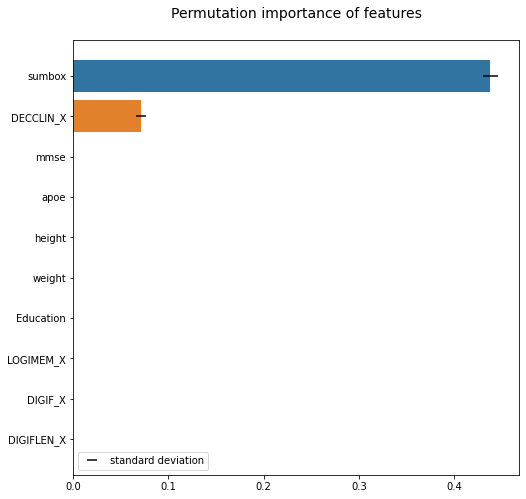

In [ ]:
importances_dict = permutation_importance(dtree_grid, X_test, y_test)
importances_mean_sorted, importances_std_sorted, feature_labels_sorted = zip(*sorted(list(zip(importances_dict['importances_mean'],importances_dict['importances_std'] ,test_df.drop(columns=['Day', 'HACHIN_X', 'Subject', 'cdr', 'ageAtEntry','Race', 'Ethnicity','cdr']).columns.tolist())), key=lambda x: -x[0]))

fig = plt.figure(figsize = (8,8))

sns.barplot(y = list(feature_labels_sorted)[:10], x = list(importances_mean_sorted)[:10], orient='h')
plt.errorbar(y = feature_labels_sorted[:10],x = importances_mean_sorted[:10], xerr = importances_std_sorted[:10], color = 'black', fmt='none', label = 'standard deviation' )

plt.title('Permutation importance of top 10 features\n', fontsize = 14)
plt.legend()
plt.show()

##### Analysing the feature importances

We can see that `sumbox` accounts for 40% and `DECCLIN_X` accounts for 10% and all the other features account to almost 0%.

This is suspicious, we need inspect again what exactly these features are.

From the NACC Uniform Data Set's Data dictionary, 
- `DECCLIN_X` is "Decline in in the subject’s memory, non-memory cognitive abilities, behavior, or ability to manage his/her affairs reported by clinician"

In [ ]:
train_df[['sumbox', 'cdr']].corr()

,sumbox,cdr
sumbox,1.000000,0.934364
cdr,0.934364,1.000000


we can see from above that it is highly correlated with the target varible `cdr`. 

- `sumbox` -  [Knight Alzheimer Disease Research Center (ADRC)](https://knightadrc.wustl.edu/wp-content/uploads/2021/12/ADRC-overall.pdf) states the below about `sumbox`.

>A quantitative derivative of the CDR, the CDR SumBox (CDR-SB), often is used as a primary outcome measures
in clinical trials of experimental anti-Alzheimer antibodies.

other proxy features which need to be removed -

- `CVDCOG_X` - If cerebrovascular disease (CVD) is contributing to the cognitive impairment.
- `DECIN_X` - decline in subject’s memory relative to
previously attained abilities reported by informant.

##### Preparing the data (again)

We should remove all the above proxy features from our data.

In [ ]:
X_train, y_train = train_df.drop(columns = ['Day', 'HACHIN_X', 'Subject', 'cdr', 'ageAtEntry','Race', 'Ethnicity', 'sumbox', 'DECCLIN_X', 'CVDCOG_X', 'DECIN_X']), train_df['cdr']
X_test, y_test = test_df.drop(columns = ['Day', 'HACHIN_X', 'Subject', 'cdr', 'ageAtEntry', 'Race', 'Ethnicity', 'sumbox', 'DECCLIN_X', 'CVDCOG_X', 'DECIN_X']), test_df['cdr']

y_train, y_test = y_train.map({0:'Non demented', 0.5:'very mild', 1: 'mild', 2: 'moderate', 3: 'severe'}), y_test.map({0:'Non demented', 0.5:'very mild', 1: 'mild', 2: 'moderate', 3: 'severe'})

In [ ]:
X_train.shape

(2666, 73)

#### Base model (after removing proxy features)

In [ ]:
print(f"The maximum depth upto with a decision tree can be built on this data is {DecisionTreeClassifier().fit(X_train,y_train).tree_.max_depth}")

The maximum depth upto with a decision tree can be built on this data is 19


In [ ]:
dtree = DecisionTreeClassifier()
param_grid = {'max_depth' : np.arange(1,20),
              'min_samples_leaf': np.arange(1,5),
              'max_features': [15, 30, 40, 50 , 73]}

dtree_grid = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs= -1)
dtree_grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_features': [15, 30, 40, 50, 73],
                         'min_samples_leaf': array([1, 2, 3, 4])})

In [ ]:
print(f"Best parameters are {dtree_grid.best_params_}\n")
print(f"The best score obtained during the grid search is  {dtree_grid.best_score_:.2f}")
print(f"The score obtained on the test data is  {dtree_grid.score(X_test, y_test):.2f}")

Best parameters are {'max_depth': 4, 'max_features': 73, 'min_samples_leaf': 4}

The best score obtained during the grid search is  0.85
The score obtained on the test data is  0.82


In [ ]:
confusion_matrix(y_test, dtree_grid.predict(X_test))

array([[401,   0,   0,   0,  35],
       [  2,  20,   2,   0,  21],
       [  0,   6,   2,   0,   0],
       [  0,   1,   0,   0,   0],
       [ 39,   7,   0,   0, 103]])

##### Permutation importance

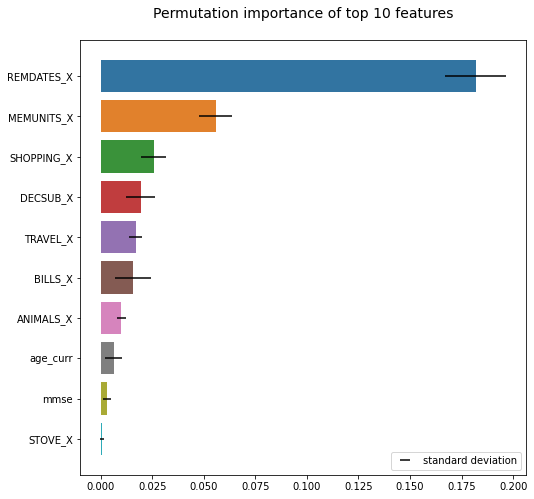

In [ ]:
importances_dict = permutation_importance(dtree_grid, X_test, y_test)
importances_mean_sorted, importances_std_sorted, feature_labels_sorted = zip(*sorted(list(zip(importances_dict['importances_mean'],importances_dict['importances_std'] ,test_df.drop(columns=['Day', 'HACHIN_X', 'Subject', 'cdr', 'ageAtEntry','Race', 'Ethnicity','sumbox', 'DECCLIN_X', 'CVDCOG_X', 'DECIN_X' ,'cdr']).columns.tolist())), key=lambda x: -x[0]))

fig = plt.figure(figsize = (8,8))

sns.barplot(y = list(feature_labels_sorted)[:10], x = list(importances_mean_sorted)[:10], orient='h')
plt.errorbar(y = feature_labels_sorted[:10],x = importances_mean_sorted[:10], xerr = importances_std_sorted[:10], color = 'black', fmt='none', label = 'standard deviation' )

plt.title('Permutation importance of top 10 features\n', fontsize = 14)
plt.legend()
plt.show()

#### Bagging

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(class_weight = 'balanced'), oob_score = True, warm_start = False, n_jobs = -1)
oobscore_dict = {}

num_estimators_list = [10,40, 60, 80, 100, 140, 180]
max_depth_list = [11, 14, 17, 20]
max_samples_list = [0.4, 0.6, 0.8, 1.0]
max_features_list = [0.4, 0.6, 0.8, 1.0]

verbose = True

for num_estimators, max_depth, max_samples, max_features in product(num_estimators_list, max_depth_list, max_samples_list, max_features_list):
  bagging.set_params(n_estimators = num_estimators, max_samples = max_samples, max_features = max_features, base_estimator__max_depth = max_depth)
  bagging.fit(X_train, y_train)
  bag_oob = bagging.oob_score_
  oobscore_dict[(num_estimators, max_depth, max_samples, max_features)] = bag_oob

  if verbose:
    print(f"{(num_estimators, max_depth, max_samples, max_features)} ---> {bag_oob}")

best_n_estimators = sorted(oobscore_dict.items(), key = lambda x: -x[1])[0][0]

(10, 11, 0.4, 0.4) ---> 0.8465866466616654
(10, 11, 0.4, 0.6) ---> 0.8383345836459115
(10, 11, 0.4, 0.8) ---> 0.8424606151537885
(10, 11, 0.4, 1.0) ---> 0.8417104276069017
(10, 11, 0.6, 0.4) ---> 0.8379594898724682


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 0.6, 0.6) ---> 0.8522130532633159


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 0.6, 0.8) ---> 0.8387096774193549


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 0.6, 1.0) ---> 0.8447111777944486


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 0.8, 0.4) ---> 0.8282070517629407


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 0.8, 0.6) ---> 0.8342085521380345


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 0.8, 0.8) ---> 0.8394598649662416


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 0.8, 1.0) ---> 0.8435858964741185


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 1.0, 0.4) ---> 0.8105776444111028


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 1.0, 0.6) ---> 0.8229557389347337


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 1.0, 0.8) ---> 0.8342085521380345


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 11, 1.0, 1.0) ---> 0.8252063015753939
(10, 14, 0.4, 0.4) ---> 0.839834958739685
(10, 14, 0.4, 0.6) ---> 0.8492123030757689
(10, 14, 0.4, 0.8) ---> 0.8525881470367592


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 0.4, 1.0) ---> 0.8417104276069017
(10, 14, 0.6, 0.4) ---> 0.8345836459114778


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 0.6, 0.6) ---> 0.845086271567892


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 0.6, 0.8) ---> 0.8432108027006752


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 0.6, 1.0) ---> 0.8364591147786947


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 0.8, 0.4) ---> 0.8345836459114778


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 0.8, 0.6) ---> 0.8342085521380345


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 0.8, 0.8) ---> 0.832708177044261


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 0.8, 1.0) ---> 0.8330832708177044


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 1.0, 0.4) ---> 0.8079519879969993


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 1.0, 0.6) ---> 0.8210802700675168


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 1.0, 0.8) ---> 0.8338334583645911


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 14, 1.0, 1.0) ---> 0.8368342085521381
(10, 17, 0.4, 0.4) ---> 0.8323330832708177
(10, 17, 0.4, 0.6) ---> 0.8330832708177044
(10, 17, 0.4, 0.8) ---> 0.840960240060015
(10, 17, 0.4, 1.0) ---> 0.8540885221305327


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 0.6, 0.4) ---> 0.8342085521380345


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 0.6, 0.6) ---> 0.8420855213803451
(10, 17, 0.6, 0.8) ---> 0.8379594898724682


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 0.6, 1.0) ---> 0.8432108027006752


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 0.8, 0.4) ---> 0.8255813953488372


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 0.8, 0.6) ---> 0.8282070517629407


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 0.8, 0.8) ---> 0.8293323330832708


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 0.8, 1.0) ---> 0.8297074268567142


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 1.0, 0.4) ---> 0.8162040510127532


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 1.0, 0.6) ---> 0.8237059264816204


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 1.0, 0.8) ---> 0.8270817704426107


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 17, 1.0, 1.0) ---> 0.8278319579894974
(10, 20, 0.4, 0.4) ---> 0.8368342085521381
(10, 20, 0.4, 0.6) ---> 0.8405851462865717
(10, 20, 0.4, 0.8) ---> 0.8480870217554388
(10, 20, 0.4, 1.0) ---> 0.8447111777944486
(10, 20, 0.6, 0.4) ---> 0.8312078019504876


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 20, 0.6, 0.6) ---> 0.839834958739685


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 20, 0.6, 0.8) ---> 0.8383345836459115
(10, 20, 0.6, 1.0) ---> 0.8443360840210052


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 20, 0.8, 0.4) ---> 0.8233308327081771


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 20, 0.8, 0.6) ---> 0.8259564891222806


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 20, 0.8, 0.8) ---> 0.8372093023255814


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 20, 0.8, 1.0) ---> 0.8375843960990248


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 20, 1.0, 0.4) ---> 0.8293323330832708


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 20, 1.0, 0.6) ---> 0.8270817704426107


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 20, 1.0, 0.8) ---> 0.8330832708177044


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(10, 20, 1.0, 1.0) ---> 0.8188297074268567
(40, 11, 0.4, 0.4) ---> 0.8717179294823706
(40, 11, 0.4, 0.6) ---> 0.8694673668417104
(40, 11, 0.4, 0.8) ---> 0.86384096024006
(40, 11, 0.4, 1.0) ---> 0.8660915228807202
(40, 11, 0.6, 0.4) ---> 0.8668417104276069
(40, 11, 0.6, 0.6) ---> 0.8702175543885972
(40, 11, 0.6, 0.8) ---> 0.8698424606151538
(40, 11, 0.6, 1.0) ---> 0.8645911477869468
(40, 11, 0.8, 0.4) ---> 0.8687171792948237
(40, 11, 0.8, 0.6) ---> 0.8615903975993998
(40, 11, 0.8, 0.8) ---> 0.8623405851462865
(40, 11, 0.8, 1.0) ---> 0.8559639909977494
(40, 11, 1.0, 0.4) ---> 0.858589647411853
(40, 11, 1.0, 0.6) ---> 0.8649662415603901
(40, 11, 1.0, 0.8) ---> 0.8567141785446362
(40, 11, 1.0, 1.0) ---> 0.8507126781695424
(40, 14, 0.4, 0.4) ---> 0.8694673668417104
(40, 14, 0.4, 0.6) ---> 0.8717179294823706
(40, 14, 0.4, 0.8) ---> 0.8649662415603901
(40, 14, 0.4, 1.0) ---> 0.8604651162790697
(40, 14, 0.6, 0.4) ---> 0.8672168042010503
(40, 14, 0.6, 0.6) ---> 0.8683420855213804
(40, 14, 0.6, 

In [ ]:
print(sorted(oobscore_dict.items(), key = lambda x: -x[1])[0])

((180, 11, 0.4, 0.8), 0.8788447111777945)


In [ ]:
best_bag = BaggingClassifier(DecisionTreeClassifier(max_depth = 11, class_weight = 'balanced'),n_estimators = 180,max_features = 0.8, max_samples = 0.4,oob_score = True, warm_start = False, n_jobs = -1)
best_bag.fit(X_train, y_train)

print(f"The score obtained on the train data is  {best_bag.score(X_train, y_train):.2f}")
print(f"The score obtained on the test data is  {best_bag.score(X_test, y_test):.2f}")

The score obtained on the train data is  0.96
The score obtained on the test data is  0.87


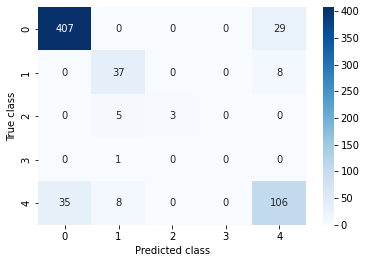

In [ ]:
sns.heatmap(confusion_matrix(y_test, best_bag.predict(X_test)),cmap='Blues', annot =True, fmt='')
plt.xlabel("Predicted class")
plt.ylabel('True class')
plt.show()

#### Adaboost

In [ ]:
boosting = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())
param_grid = {'n_estimators': [10,40, 60, 80, 100, 140, 180],
              'learning_rate': np.concatenate( (np.arange(0.01,0.1,0.02), np.array([0.001, 0.005])) ),
              'base_estimator__max_depth': [1, 2, 3]}
boost_grid = GridSearchCV(estimator = boosting, param_grid = param_grid, scoring = 'f1_micro' ,cv = 5, verbose = 1)
boost_grid.fit(X_train,y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': array([0.01 , 0.03 , 0.05 , 0.07 , 0.09 , 0.001, 0.005]),
                         'n_estimators': [10, 40, 60, 80, 100, 140, 180]},
             scoring='f1_micro', verbose=1)

In [ ]:
print(f"Best parameters are {boost_grid.best_params_}\n")

Best parameters are {'base_estimator__max_depth': 3, 'learning_rate': 0.005, 'n_estimators': 140}



The score obtained on the train data is  0.99
The score obtained on the test data is  0.99



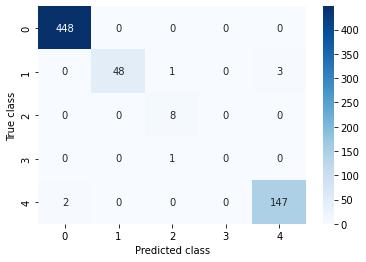

In [55]:
best_boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 140, learning_rate = 0.005)
best_boost.fit(X_train, y_train)

print(f"The score obtained on the train data is  {best_boost.score(X_train, y_train):.2f}")
print(f"The score obtained on the test data is  {best_boost.score(X_test, y_test):.2f}\n")

sns.heatmap(confusion_matrix(y_test, best_boost.predict(X_test)),cmap='Blues', annot =True, fmt='')
plt.xlabel("Predicted class")
plt.ylabel('True class')
plt.show()

## Predicting `cdr` into the future

Instead of predicting the `cdr` of the subject in a particular visit given the features, we can try predicting if the person will have Alzeihmer's in the future.

In [ ]:
cdr_max_df = train_df.groupby('Subject')['cdr'].max().to_frame().reset_index()
cdr_max_df.columns = ['Subject', 'cdr_max']
cdr_max_df.head()

,Subject,cdr_max
0,OAS30001,0.0
1,OAS30010,0.0
2,OAS30011,0.0
3,OAS30013,0.5
4,OAS30015,0.0


In [ ]:
train_df_cdrMAX = train_df.merge(cdr_max_df, on = 'Subject', how = 'left')

In [ ]:
(train_df_cdrMAX.isna().sum() !=0).sum()

0

If we are predicting if a person will have dementia in the future, then it would make more sense to test our model on the subjects whose `cdr` has changed.

In [ ]:
converted_subjects = test_df['Subject'].unique()[test_df.groupby('Subject').apply(lambda x: x['cdr'].nunique() !=1)].tolist()

In [ ]:
'OAS30002' in converted_subjects

False

In [ ]:
test_df_converted = test_df.loc[ test_df['Subject'].isin(converted_subjects) ,:].copy()

In [ ]:
cdr_max_df_test = test_df_converted.groupby('Subject')['cdr'].max().to_frame().reset_index()
cdr_max_df_test.columns = ['Subject', 'cdr_max']
cdr_max_df_test.head()

,Subject,cdr_max
0,OAS30058,0.5
1,OAS30145,2.0
2,OAS30172,1.0
3,OAS30206,0.5
4,OAS30208,0.5


In [ ]:
cdr_max_df_test['cdr_max'].value_counts()

0.5    24
1.0    12
2.0     8
3.0     1
Name: cdr_max, dtype: int64

In [ ]:
test_df_cdrMAX = test_df_converted.merge(cdr_max_df_test, on = 'Subject', how = 'left')

In [ ]:
X_train_f, y_train_f = train_df_cdrMAX.drop(columns = ['Day', 'HACHIN_X', 'Subject', 'cdr', 'ageAtEntry','Race', 'Ethnicity', 'sumbox', 'DECCLIN_X', 'CVDCOG_X', 'DECIN_X', 'cdr_max']), train_df_cdrMAX['cdr_max']
X_test_f, y_test_f = test_df_cdrMAX.drop(columns = ['Day', 'HACHIN_X', 'Subject', 'cdr', 'ageAtEntry', 'Race', 'Ethnicity', 'sumbox', 'DECCLIN_X', 'CVDCOG_X', 'DECIN_X','cdr_max']), test_df_cdrMAX['cdr_max']

y_train_f, y_test_f = y_train_f.map({0:'Non demented', 0.5:'very mild', 1: 'mild', 2: 'moderate', 3: 'severe'}), y_test_f.map({0:'Non demented', 0.5:'very mild', 1: 'mild', 2: 'moderate', 3: 'severe'})

#### Base model

In [ ]:
print(f"The maximum depth upto with a decision tree can be built on this data is {DecisionTreeClassifier().fit(X_train_f,y_train_f).tree_.max_depth}")

The maximum depth upto with a decision tree can be built on this data is 28


In [ ]:
dtree = DecisionTreeClassifier()
param_grid = {'max_depth' : np.arange(1,29),
              'min_samples_leaf': np.arange(1,5),
              'max_features': [15, 30, 40, 50 , 73]}

dtree_grid = GridSearchCV(estimator=dtree, param_grid=param_grid, scoring = 'f1_micro' ,cv=5, n_jobs= -1)
dtree_grid.fit(X_train_f, y_train_f)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
                         'max_features': [15, 30, 40, 50, 73],
                         'min_samples_leaf': array([1, 2, 3, 4])},
             scoring='f1_micro')

In [ ]:
print(f"Best parameters are {dtree_grid.best_params_}\n")
print(f"The best score obtained during the grid search is  {dtree_grid.best_score_:.2f}")
print(f"The score obtained on the test data is  {dtree_grid.score(X_test_f, y_test_f):.2f}")

Best parameters are {'max_depth': 4, 'max_features': 50, 'min_samples_leaf': 2}

The best score obtained during the grid search is  0.67
The score obtained on the test data is  0.40


In [ ]:
best_dtree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 2, max_features = 50)
best_dtree.fit(X_train_f, y_train_f)

print(f"Train accuracy: {best_dtree.score(X_train_f, y_train_f):.2f}")
print(f"Test accuracy: {best_dtree.score(X_test_f, y_test_f):.2f}")

Train accuracy: 0.72
Test accuracy: 0.47


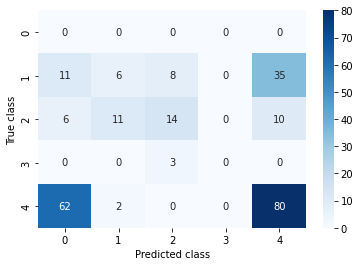

In [ ]:
sns.heatmap(confusion_matrix(y_test_f, dtree_grid.predict(X_test_f)),cmap='Blues', annot =True, fmt='')
plt.xlabel("Predicted class")
plt.ylabel('True class')
plt.show()

##### Permutation importance

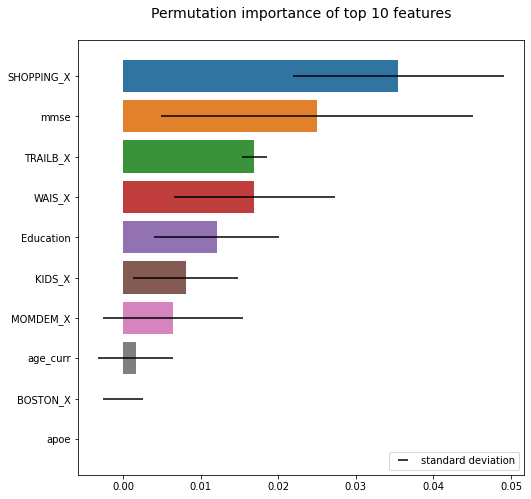

In [ ]:
importances_dict = permutation_importance(best_dtree, X_test_f, y_test_f)
importances_mean_sorted, importances_std_sorted, feature_labels_sorted = zip(*sorted(list(zip(importances_dict['importances_mean'],importances_dict['importances_std'] ,test_df_cdrMAX.drop(columns=['Day', 'HACHIN_X', 'Subject', 'cdr', 'ageAtEntry','Race', 'Ethnicity','sumbox', 'DECCLIN_X', 'CVDCOG_X', 'DECIN_X' ,'cdr', 'cdr_max']).columns.tolist())), key=lambda x: -x[0]))

fig = plt.figure(figsize = (8,8))

sns.barplot(y = list(feature_labels_sorted)[:10], x = list(importances_mean_sorted)[:10], orient='h')
plt.errorbar(y = feature_labels_sorted[:10],x = importances_mean_sorted[:10], xerr = importances_std_sorted[:10], color = 'black', fmt='none', label = 'standard deviation' )

plt.title('Permutation importance of top 10 features\n', fontsize = 14)
plt.legend()
plt.show()

**Observation**: 
- We can observe that when we try to predict `cdr` value of a subject in the future using the information that we have, the model does poorly, the accuracy of the model is 47% and the f1_micro score is 0.40.
- From the permutation importances plot, we can observe that the standard deviation of feature importances are very high, it could be because the model is not learning it correctly.

## Using data obtained from the scans

**Freesurfers** data along with adrc clinical data

freesurfers data contains segmentatin volumes of various parts of brain scan images processed using freesurfer data.

### Data processing

In [ ]:
fs_adrc = pd.read_csv(dir_path + 'cleaned/' + 'fs_adrc.csv')
fs_adrc.head()

,FS_FSDATA ID,Subject,IntraCranialVol,lhCortexVol,rhCortexVol,CortexVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,lhCorticalWhiteMatterVol,...,mmse_X,ageAtEntry_X,cdr_X,apoe_X,height_X,weight_X,Race_X,Ethnicity_X,Education_X,Day_X
0,OAS30001_Freesurfer53_d0129,OAS30001,1.136504e+06,191917.394056,187528.786036,379446.180091,50687.0,517683.180091,8.105851e+05,184600.488060,...,28.0,65.149895,0.0,23.0,64.0,155.0,Caucasian,Non-Hispanic,12.0,0.0
1,OAS30001_Freesurfer53_d0757,OAS30001,1.134037e+06,184473.276223,177566.874682,362040.150904,50071.0,500699.150904,7.993419e+05,185224.779932,...,30.0,65.149895,0.0,23.0,64.0,162.0,Caucasian,Non-Hispanic,12.0,722.0
2,OAS30001_Freesurfer53_d2430,OAS30001,1.238313e+06,178911.809415,178872.680224,357784.489639,49058.0,487405.489639,7.779313e+05,175955.968883,...,30.0,65.149895,0.0,23.0,63.0,180.0,Caucasian,Non-Hispanic,12.0,2181.0
3,OAS30001_Freesurfer53_d3132,OAS30001,1.186091e+06,181943.698754,178031.558882,359975.257636,48400.0,491102.257636,7.736716e+05,174372.329393,...,30.0,65.149895,0.0,23.0,64.0,180.0,Caucasian,Non-Hispanic,12.0,3025.0
4,OAS30002_Freesurfer53_d0653,OAS30002,1.727246e+06,234286.410947,236894.539679,471180.950626,60386.0,628934.950626,1.085865e+06,253411.175744,...,29.0,67.206024,0.0,34.0,64.0,145.0,Caucasian,Non-Hispanic,18.0,751.0


In [ ]:
(fs_adrc.isna().sum()!=0).sum()

0

In [ ]:
fs_adrc['Age_Curr'] = fs_adrc['ageAtEntry_X'] + fs_adrc['Day_X']/365

In [ ]:
fs_adrc = fs_adrc.join(pd.get_dummies(fs_adrc[['Race_X', 'Ethnicity_X']]))

In [ ]:
unique_subs =  fs_adrc['Subject'].unique()
train_subs, test_subs = train_test_split(unique_subs, train_size = 0.8, stratify = fs_adrc.groupby('Subject')['cdr_X'].max())

In [ ]:
print(f"Number unique subjects in the train data {train_subs.shape[0]}")
print(f"Number unique subjects in the test data {test_subs.shape[0]}")

Number unique subjects in the train data 802
Number unique subjects in the test data 201


In [ ]:
train_df_fs = fs_adrc.loc[fs_adrc['Subject'].isin(train_subs),:]
test_df_fs = fs_adrc.loc[fs_adrc['Subject'].isin(test_subs),:]

In [ ]:
print(f"Number observations in the train data {train_df_fs.shape[0]}")
print(f"Number observations in the test data {test_df_fs.shape[0]}")

Number observations in the train data 1494
Number observations in the test data 375


In [ ]:
X_train_fs = train_df_fs.drop(columns = ['FS_FSDATA ID', 'Subject' ,'Race_X', 'Ethnicity_X', 'Day_X', 'ageAtEntry_X', 'cdr_X'])
X_test_fs = test_df_fs.drop(columns = ['FS_FSDATA ID', 'Subject','Race_X', 'Ethnicity_X', 'Day_X', 'ageAtEntry_X', 'cdr_X'])

y_train_fs = train_df_fs['cdr_X']
y_test_fs = test_df_fs['cdr_X']

y_train_fs, y_test_fs = y_train_fs.map({0:'Non demented', 0.5:'very mild', 1: 'mild', 2: 'moderate', 3: 'severe'}), y_test_fs.map({0:'Non demented', 0.5:'very mild', 1: 'mild', 2: 'moderate', 3: 'severe'})

In [ ]:
X_train_fs.shape

(1494, 208)

In [ ]:
y_train_fs.value_counts()

Non demented    1179
very mild        238
mild              71
moderate           6
Name: cdr_X, dtype: int64

In [ ]:
y_test_fs.value_counts()

Non demented    299
very mild        59
mild             16
moderate          1
Name: cdr_X, dtype: int64

### PCA

In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_fs)

In [ ]:
pca = PCA()
pca.fit(X_train_scaled)

X_transformed = pca.fit_transform(X_train_scaled)

X_transformed.shape

(1498, 208)

Text(0, 0.5, 'Ratio')

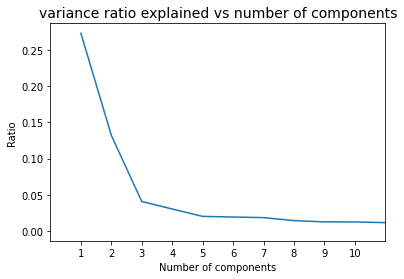

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlim([-1,10])
plt.xticks(range(0,10),range(1,11))
plt.title("variance ratio explained vs number of components", fontsize = 14)
plt.xlabel('Number of components')
plt.ylabel('Ratio')

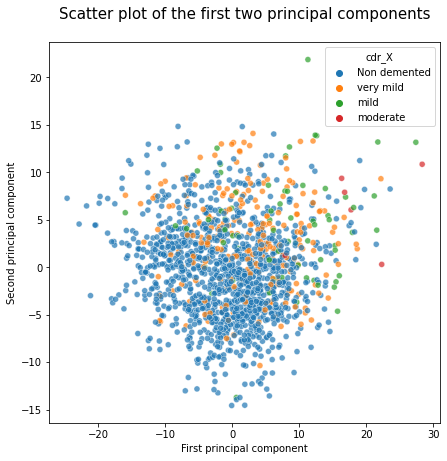

In [ ]:
fig = plt.figure(figsize = (7,7))
sns.scatterplot(x = X_transformed[:,0], y = X_transformed[:,1], hue = y_train_fs, alpha =0.7)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Scatter plot of the first two principal components\n', fontsize = 15)
plt.show()

Although the points of each class does not seem to be distinctively seperated, we can observe that on the top right there seem to be more points with demented class than points with non-demented class.

### TSNE

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=40,learning_rate=100,n_iter=1000,random_state=0)
tsne_data = model.fit_transform(X_train_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


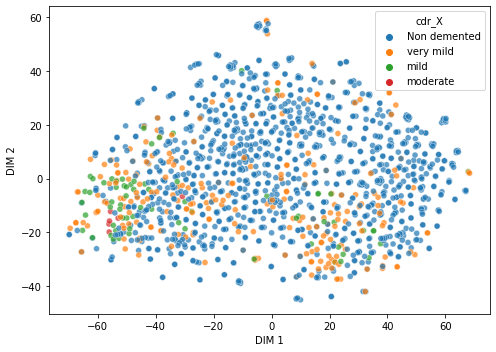

In [ ]:
fig = plt.figure(tight_layout = True, figsize = (7,5))
sns.scatterplot(x = tsne_data[:,0], y = tsne_data[:,1], hue = y_train_fs, alpha = 0.7)
plt.xlabel('DIM 1')
plt.ylabel('DIM 2')
plt.show()

t-SNE helps us to visualize high dimensional data, since freesurfers data is high dimensional, t-SNE could help us visualize it in lower dimensions.

From the plot we can observe that there are clusters of points with demented class on the bottom right and left and in some middle portions as well.

### Base model

In [ ]:
print(f"The maximum depth upto with a decision tree can be built on this data is {DecisionTreeClassifier().fit(X_train_fs,y_train_fs).tree_.max_depth}")

The maximum depth upto with a decision tree can be built on this data is 30


In [ ]:
dtree = DecisionTreeClassifier()
param_grid = {'max_depth' : np.arange(1,30,2),
              'max_features': np.arange(10,208,40)}

dtree_grid = GridSearchCV(estimator=dtree, param_grid=param_grid,scoring = 'f1_micro', cv=5, n_jobs= -1)
dtree_grid.fit(X_train_fs, y_train_fs)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'max_features': array([ 10,  50,  90, 130, 170])},
             scoring='f1_micro')

In [ ]:
print(f"Best parameters are {dtree_grid.best_params_}\n")
print(f"The best score obtained during the grid search is  {dtree_grid.best_score_:.2f}")
print(f"The score obtained on the test data is  {dtree_grid.score(X_test_fs, y_test_fs):.2f}")

Best parameters are {'max_depth': 3, 'max_features': 170}

The best score obtained during the grid search is  0.82
The score obtained on the test data is  0.85


In [33]:
best_dtree = DecisionTreeClassifier(max_depth = 3, max_features = 170)
best_dtree.fit(X_train_fs, y_train_fs)

print(f"The accuracy score on the train data is {best_dtree.score(X_train_fs, y_train_fs):.2f}")
print(f"The accuracy score on the test data is {best_dtree.score(X_test_fs, y_test_fs):.2f}")

The accuracy score on the train data is 0.85
The accuracy score on the test data is 0.84


In [38]:
np.unique(y_test_fs)

array(['Non demented', 'mild', 'moderate', 'very mild'], dtype=object)

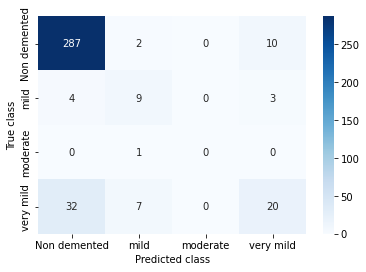

In [40]:
sns.heatmap(pd.DataFrame(data = confusion_matrix(y_test_fs, best_dtree.predict(X_test_fs)), columns = np.unique(y_test_fs), index =  np.unique(y_test_fs)),cmap='Blues', annot =True, fmt='')
plt.xlabel("Predicted class")
plt.ylabel('True class')
plt.show()

##### Permutation importance

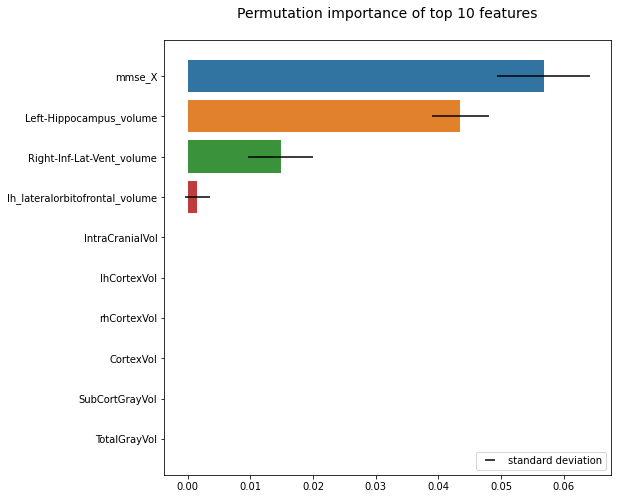

In [ ]:
importances_dict = permutation_importance(best_dtree, X_test_fs, y_test_fs)
importances_mean_sorted, importances_std_sorted, feature_labels_sorted = zip(*sorted(list(zip(importances_dict['importances_mean'],importances_dict['importances_std'] ,test_df_fs.drop(columns=['FS_FSDATA ID', 'Subject' ,'Race_X', 'Ethnicity_X', 'Day_X', 'ageAtEntry_X', 'cdr_X']).columns.tolist())), key=lambda x: -x[0]))

fig = plt.figure(figsize = (8,8))

sns.barplot(y = list(feature_labels_sorted)[:10], x = list(importances_mean_sorted)[:10], orient='h')
plt.errorbar(y = feature_labels_sorted[:10],x = importances_mean_sorted[:10], xerr = importances_std_sorted[:10], color = 'black', fmt='none', label = 'standard deviation' )

plt.title('Permutation importance of top 10 features\n', fontsize = 14)
plt.legend()
plt.show()

We can infer from the above plot that MMSE score is the most important feature to this model's predictions.
This is expected since MMSE score derived from a test of cognitive function
among the elderly.

The second most important feature to this model's predictions is `Left-Hippocampus_volume`. Left Hippocampus in our brain [consolidates](https://www.verywellhealth.com/what-is-the-hippocampus-p2-98810) short and long term memory. So, we can expect any change in it's volume to effect memory of a subject.

### Adaboost

In [ ]:
np.concatenate( (np.arange(0.01,0.1,0.02), np.array([0.001, 0.005])) )

array([0.01 , 0.03 , 0.05 , 0.07 , 0.09 , 0.001, 0.005])

In [ ]:
boosting = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())
param_grid = {'n_estimators': [40, 100, 140],
              'learning_rate': [0.01 , 0.03 , 0.07 , 0.001],
              'base_estimator__max_depth': [1, 2,]}
boost_grid = GridSearchCV(estimator = boosting, param_grid = param_grid, scoring = 'f1_micro' ,cv = 5, verbose = 4)
boost_grid.fit(X_train_fs,y_train_fs)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=40;, score=0.797 total time=   1.7s
[CV 2/5] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=40;, score=0.841 total time=   1.7s
[CV 3/5] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=40;, score=0.811 total time=   1.3s
[CV 4/5] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=40;, score=0.824 total time=   1.2s
[CV 5/5] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=40;, score=0.786 total time=   1.2s
[CV 1/5] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100;, score=0.801 total time=   3.1s
[CV 2/5] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100;, score=0.824 total time=   3.1s
[CV 3/5] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100;, score=0.851 total time=   3.1s
[CV 4/5] END base_estimator__max_depth=1, learn

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2],
                         'learning_rate': [0.01, 0.03, 0.07, 0.001],
                         'n_estimators': [40, 100, 140]},
             scoring='f1_micro', verbose=4)

In [ ]:
print(f"Best parameters are {boost_grid.best_params_}\n")
print(f"Best score obtained in the grid search: {boost_grid.best_score_:.2f}")
print(f"The score obtained on the test data is  {boost_grid.score(X_test_fs, y_test_fs):.2f}")

Best parameters are {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 40}

Best score obtained in the grid search: 0.83
The score obtained on the test data is  0.84


The accuracy score obtained on the train data is  0.85
The accuracy score obtained on the test data is  0.83



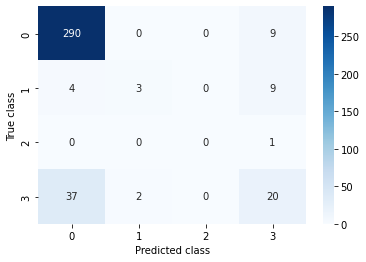

In [ ]:
best_boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 40, learning_rate = 0.01)
best_boost.fit(X_train_fs, y_train_fs)

print(f"The accuracy score obtained on the train data is  {best_boost.score(X_train_fs, y_train_fs):.2f}")
print(f"The accuracy score obtained on the test data is  {best_boost.score(X_test_fs, y_test_fs):.2f}\n")

sns.heatmap(confusion_matrix(y_test_fs, best_boost.predict(X_test_fs)),cmap='Blues', annot =True, fmt='')
plt.xlabel("Predicted class")
plt.ylabel('True class')
plt.show()

### Intrepeting the model predictions

#### LIME

In [ ]:
# pip install lime

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
explainer = LimeTabularExplainer(X_train_fs.values,
                                 feature_names=X_train_fs.columns,
                                 class_names = ['Non demented', 'very mild', 'mild', 'moderate'],
                                 mode='classification')

idx = 109

exp = explainer.explain_instance(X_test_fs.values[idx], 
                                 best_boost.predict_proba,
                                 num_features = 10)


exp.show_in_notebook(show_table=True, show_all=False)

print(f"\nModel prediction :{best_boost.predict(X_test_fs.iloc[idx, :].to_frame().T)}")
print(f"True class: {y_test_fs.values[idx]}")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"



Model prediction :['Non demented']
True class: Non demented
